## Aplicar al menos un algoritmo no supervisado a tus datos para encontrar estructuras subyacentes

### DBSCAN

In [21]:
#manejo de datos
import pandas as pd
import numpy as np

#gráficos
import seaborn as sns
import matplotlib.pyplot as plt

# Ignorar advertencias
import warnings
warnings.filterwarnings('ignore')   

In [22]:
df_feature = pd.read_csv("../../Datos/" + "df_feature.csv").drop(['time'],axis=1)
df_feature

,temperature_2m_max (°C),rain_sum (mm),precipitation_hours (h),dia_de_la_semana,semana_del_mes,semana_del_anio,anio,mes,es_fin_de_semana,es_festivo_mexico,dia_partido,es_dia_laborable,weathercode_3,weathercode_53
0,20.6,12.4,17,1,15,15,2018,4,0,0,0,1,0,0
1,30.1,0.2,2,6,37,37,2017,9,1,0,0,0,0,0
2,32.8,0.0,0,3,24,24,2022,6,0,0,0,1,0,0
3,25.4,0.0,0,5,44,44,2018,11,1,0,0,0,0,0
4,27.0,18.2,19,6,37,37,2022,9,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1297,21.2,0.0,0,6,2,2,2021,1,1,0,0,0,0,0
1298,27.2,1.4,7,5,18,18,2021,5,1,1,0,0,0,0
1299,28.2,0.0,0,6,46,46,2022,11,1,0,0,0,0,0
1300,25.0,0.0,0,5,48,48,2018,12,1,1,0,0,0,0


In [23]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np

# Escala tus datos para que tengan media 0 y varianza 1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_feature)

# Crea una instancia de DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Ajusta estos parámetros según tus necesidades

# Ajusta el modelo a tus datos
dbscan.fit(X_scaled)

# Etiquetas de los clústeres asignados por DBSCAN. Los ruidosos tienen etiqueta -1.
labels = dbscan.labels_

# Número de clústeres encontrados (sin contar el ruido)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

# Muestra la cantidad de clústeres y sus miembros
print("Número de clústeres:", n_clusters)
for i in range(n_clusters):
    cluster_points = df_feature[labels == i]
    print(f"Clúster {i + 1} tiene {len(cluster_points)} miembros:")
    print(cluster_points)

# Puntos ruidosos (etiqueta -1)
noise_points = df_feature[labels == -1]
print("Puntos ruidosos:")
print(noise_points)


Número de clústeres: 17
Clúster 1 tiene 18 miembros:
      temperature_2m_max (°C)  rain_sum (mm)  precipitation_hours (h)   
50                       31.6            0.0                        0  \
368                      32.9            0.1                        1   
407                      32.8            0.0                        0   
416                      33.0            0.4                        1   
497                      33.2            0.0                        0   
610                      33.8            0.0                        0   
696                      30.2            0.0                        0   
757                      33.3            0.0                        0   
844                      30.9            0.1                        1   
847                      32.7            0.0                        0   
857                      34.1            0.0                        0   
883                      34.0            0.0                        0  

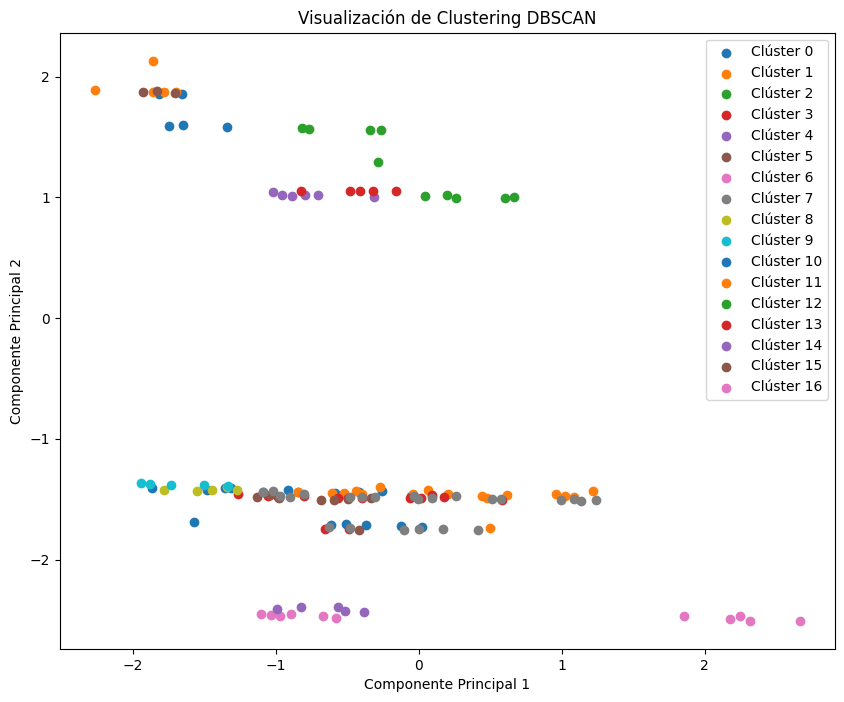

In [24]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce la dimensionalidad de los datos a 2 dimensiones usando PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Grafica los puntos en el plano 2D con colores según las etiquetas del clúster
plt.figure(figsize=(10, 8))
unique_labels = set(labels)

for label in unique_labels:
    if label == -1:
        # Puntos ruidosos en negro
        s1=1
        #plt.scatter(X_pca[labels == label, 0], X_pca[labels == label, 1], c='k', label='Ruido')
    else:
        # Puntos en clústeres
        plt.scatter(X_pca[labels == label, 0], X_pca[labels == label, 1], label=f'Clúster {label}')

plt.legend()
plt.title('Visualización de Clustering DBSCAN')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()


### OPTICS 

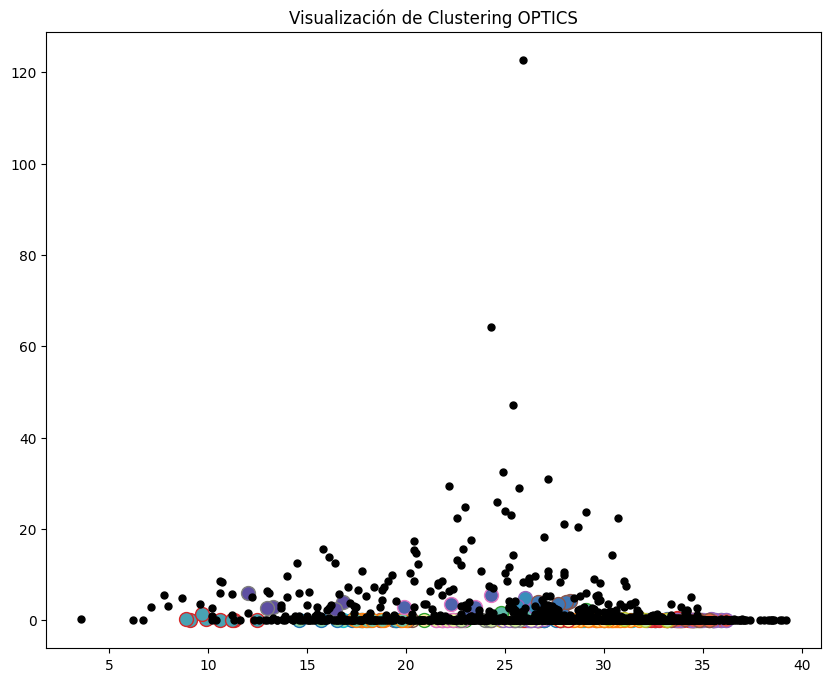

In [29]:
import pandas as pd
from sklearn.cluster import OPTICS
import numpy as np
import matplotlib.pyplot as plt

# Supongamos que tienes tus datos en un DataFrame de Pandas 'df_feature'.
# Asegúrate de que 'df_feature' tenga las columnas adecuadas.

# Crea una instancia de OPTICS
optics = OPTICS(min_samples=5, xi=0.05)  # Ajusta estos parámetros según tus necesidades

# Ajusta el modelo a tus datos
optics.fit(df_feature)

# Etiquetas de clústeres asignadas por OPTICS. Los ruidosos tienen etiqueta -1.
labels = optics.labels_

# Visualiza los resultados
# Número de clústeres encontrados (sin contar el ruido)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

# Visualiza los clústeres y los puntos ruidosos
plt.figure(figsize=(10, 8))
colors = plt.cm.Spectral(np.linspace(0, 1, n_clusters))

for cluster_id, color in zip(range(n_clusters), colors):
    cluster_points = df_feature[labels == cluster_id].to_numpy()
    plt.plot(cluster_points[:, 0], cluster_points[:, 1], 'o', markerfacecolor=color, markersize=10)

noise_points = df_feature[labels == -1].to_numpy()
plt.plot(noise_points[:, 0], noise_points[:, 1], 'o', color='black', markersize=5)

plt.title('Visualización de Clustering OPTICS')
plt.show()



## Elegir alguna métrica para determinar número de grupos, usarla y discutirla
DBSCAN no necesita recibir un número de grupos